No presente projeto irei fazer uma análise na base de dados Titanic para a utilização de machine learning. Onde irei explorar um projeto de machine learning do início ao fim. Explicando passo a passo.

- André Leocádio

In [1]:
# Primeiro passo: Importar as librarias.

# Algebra Linear
import numpy as np 

# Processamento de dados
import pandas as pd 

# visualização de dados
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algaritmos para as predições
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# Importanto os datasets

# Dados em: https://www.kaggle.com/c/titanic/data

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#Neste caso não foi preciso dividir a base de dados, pois os dados ja foram importados com a dividisão 

- EXPLORANDO OS DADOS

In [3]:
df_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Podemos ver que no dataset existem variáveis categóricas e numéricas, entâo tera que ser feita uma mudança nesta variáves categóricas para numéricas. Possuem tambem muitas amostras NaN que devem ser retiradas.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# A variável a ser predita é "Survived", pois indica que 0 para morte e 1 para vida.

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


E possivel ver acima que a variável "age" apresenta valores nulos, pois contem uma amortra menor que as restantes. A variável survive indica que 38% sobreviveram ao desastre na amotra de treino( não a total), a ideade média é de 29 anos.

In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
 # Indica a porcentagem de valores nulos em cada variável.

df_train.isnull().sum()/df_train.isnull().count()*100


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
# Pode-se ver que nas features "Age" e "Cabin" contém muitas variáveis nulas que devem ser excluidas.
# Abaixo iremos analisar melhor os valores nulos apresentados.

total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)



,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


A variavel "Cabin" com 77% de valores missings, pode ser que tenha que ser excluida do dataset. Sebdo assim deve ser investigada mas profundamente.

In [18]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Acima temos que ver quais variáveis podem influenciar em uma maior taxa de sobrevivencia no Titanic. No caso devido a correlação esperada ser zero, as variáveis que não possuem ligação são 'PassengerId', 'Name', 'Ticket'.

- Analisando as features utilizadas. (Por meio da varial class (chance de sobrevivencia).

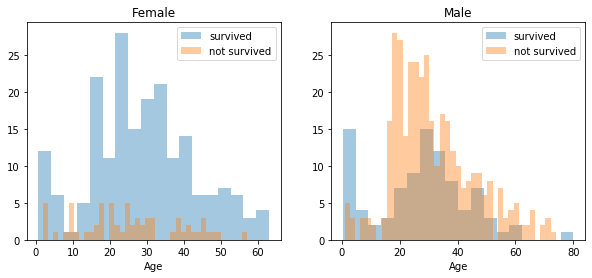

In [24]:
# 'Age' e 'Sex'

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df_train[df_train['Sex']=='female']
men = df_train[df_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Acima podemos ver que em relação a idade dividida por sexo, o feminino possui uma maior chance de sobrevivencia que está entre 18 e 40 anos, sendo que a maoir parte da população feminina sobreviveram. Já para o sexo masculino a faixa etária dos sobreviventes está em de 2 ate 18, onde a maior parte da população masculina não sobreviveu ao acidente.

C:\Users\Andre\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


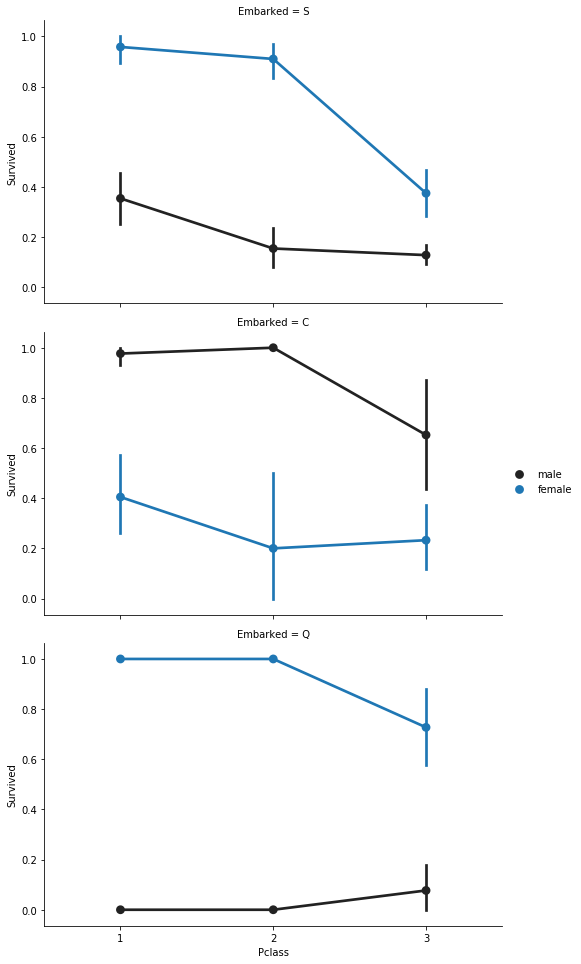

In [25]:
# "Embarked", "Pclass" and "Sex":

# Utilizando o método pointplot da biblioteca seaborn.

FacetGrid = sns.FacetGrid(df_train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()



Nos portos S e Q o sexo feminino representa maior chance de sobrevivencia que o masculino. Tambem obteve uma correlação entre a variável PClass e sobrevivência. (Análise abaixo)


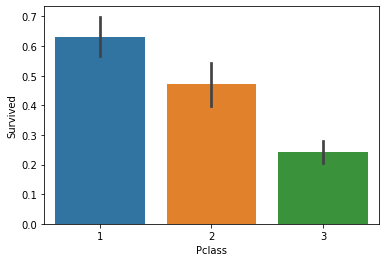

In [26]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

Portanto como indicado a classe do passageiro influência na chance de sobrevivência. Onde a primeira classe possui maior chance de sobreviver.

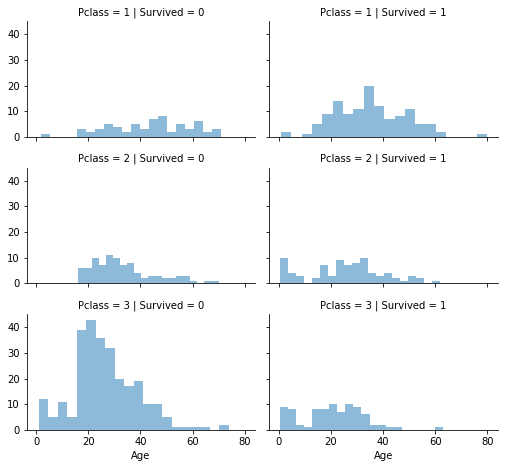

In [27]:
# Abaixo criaremos outra análise para a correlação entre as classes acima.

grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Acima é visto a confirmação da influência da classe do navio com a porcentagem de sobrevivência, portanto possui correlação entre as duas variáveis.

In [29]:
# "SibSp" e "Parch"(o número de parentes que cada pessoa possui no navio):

data = [df_train, df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [30]:
df_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\Andre\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


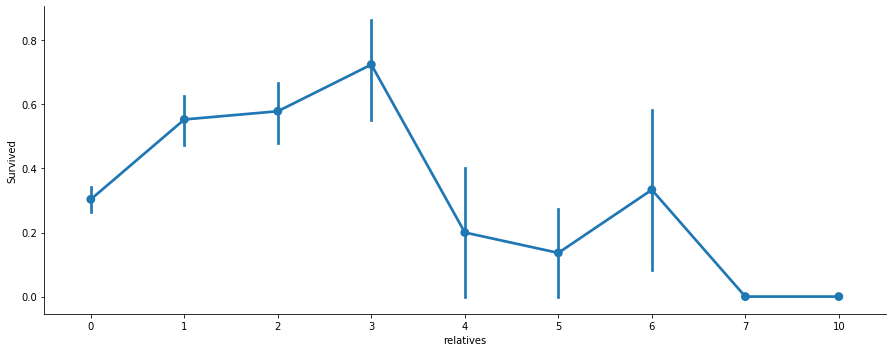

In [31]:
axes = sns.factorplot('relatives','Survived', 
                      data=df_train, aspect = 2.5, )

Portanto a chance de sobrevivência é maior de 1 a 3 parentes, porém diminue se a pessoa tiver 4 ou mais parentes, sendo uma chance menor do que se a pessoa estiver sozinha no návio.

- PROCESSAMENTO DOS DADOS

In [37]:
# iniciamente irei retirar a variável "Passengerid", dos dados de treino, pois não possui correlação com a variavel resposta.

df_train = df_train.drop(['PassengerId'], axis=1)

KeyError: "['PassengerId'] not found in axis"

Missing Data

Variável: Cabin

Na variável cabin contem aletra que indica o conves no navio, o andar do conves pode ter relação com a chance de sobrevivencia. Portanto vamos extraí-los e criar uma nova variável, que contém o numero do andar do convés de pessoas. Depois, converteremos o recurso em uma variável numérica. Os valores ausentes serão convertidos em zero.

In [40]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,1,8


In [41]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train, df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

In [44]:
#Dropando agora a variável cabin

df_train = df_train.drop(['Cabin'], axis=1)


KeyError: "['Cabin'] not found in axis"

In [45]:
df_test = df_test.drop(['Cabin'], axis=1)

Variável: Age
    
Agora para retirar os m issing values vou criar uma matriz que contém números aleatórios, que são calculados com base no valor médio da idade em relação ao desvio padrão e is_null.

In [53]:
data = [df_train, df_test]

for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # computa os numeros aleatórios entre a média, desvio padrão e nulos.
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # preenche os valores de NaN em Age com os valores aleátorios gerados. 
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train["Age"].astype(int)

In [51]:
dataset["Age"]

0      22
1      38
2      26
3      35
4      35
       ..
413    30
414    44
415    21
416    34
417    18
Name: Age, Length: 418, dtype: int32

In [56]:
df_train["Age"].isnull().sum()

0

Variável: Embarked
    
Como possue apenas 2 missing, podemos preencher com o valor mais comum.

In [59]:
df_train["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [60]:
common_value = 'S'
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [62]:
df_train["Embarked"].isnull().sum()

0

Convertendo as variáveis

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


Podemos ver que 'Fare' é uma float e existem 4 variáveis object, temos que convertelas em valores numéricos.

In [64]:
# Fare

data = [df_train, df_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)# função transforma os valores NaN em 0.
    dataset['Fare'] = dataset['Fare'].astype(int)# função transforma os valores em int.

In [66]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,1,8


In [67]:
#Name

data = [df_train, df_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # Extrai os titulos
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # substitue titulos por um título mais comum ou como raro.
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # converte titulos em números
    dataset['Title'] = dataset['Title'].map(titles)
    # preenchendo NaN com zero
    dataset['Title'] = dataset['Title'].fillna(0)

In [81]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,1,35,1,0,113803,53,S,1,0,3,3
4,0,3,0,35,0,0,373450,8,S,0,1,8,1


In [72]:
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)


In [80]:
#Sex
genders = {"male":0, "female": 1}
data = [df_train, df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [82]:
#Ticket

df_train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

como existe 681 de tickets exclusivos, será deficil converte-lo em uma variavel util, portanto vamos exclui-lo do dataset

In [83]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)

In [84]:
#Embarked

ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [85]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,0,8,1
1,1,1,1,38,1,0,71,1,1,0,3,3
2,1,3,1,26,0,0,7,0,0,1,8,2
3,1,1,1,35,1,0,53,0,1,0,3,3
4,0,3,0,35,0,0,8,0,0,1,8,1


Criando categorias

Variável: Age
    
Vamos agora dividir a idade em grupos, prmeiro converter para int, e depois criar uma variável 'AgeGroup', categorizando as idades em cada grupo. Se deve tomar cuidado para os dados não ficarem mal dividios, como uma grande parte dos dados ficarem em apenas um grupo.

In [86]:
data = [df_train, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [90]:
df_train['Age'].value_counts()

4    164
6    161
5    152
3    136
2    112
1     98
0     68
Name: Age, dtype: int64

In [94]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1
5,0,3,0,5,0,0,1,2,0,1,8,1
6,0,1,0,6,0,0,3,0,0,1,5,1
7,0,3,0,0,3,1,2,0,4,0,8,4
8,1,3,1,3,0,2,1,0,2,0,8,3
9,1,2,1,1,1,0,2,1,1,0,8,3


Variável: Fare

Aqui devemos tambem dividir em grupos as tarifas, porem deve-se tomar cuidado para não ficar 80% dos valores em apenas um grupo. Felizmente, podemos usar a função sklearn "qcut ()", onde podemos usar para ver como podemos formar as categorias.

In [93]:
data = [df_train, df_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

- CRIANDO NOVAS VARIÁVEIS

Irá ser adicionadas mais duas variáveis, computadas por das variáveis já existentes

In [95]:
# Age Times Class

data = [df_train, df_test]

for dataset in data:
    dataset['Age_class']=dataset['Age']*dataset['Pclass']

In [96]:
# Fare per Person

data = [df_train, df_test]

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [97]:
df_train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,5,0,0,1,2,0,1,8,1,15,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


Uma breve analise por enquanto é possivel cponcluir que quanto menor a 'Age_class', maoir a chance de sobrevivência

- CONSTRUINDO OS MODELOS DE MACHINE LEARNING

In [98]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_class,Fare_Per_Person
0,892,3,0,2,0,0,0,2,0,1,8,1,6,0
1,893,3,1,5,1,0,0,0,1,0,8,3,15,0
2,894,2,0,3,0,0,1,2,0,1,8,1,6,1
3,895,3,0,5,0,0,1,0,0,1,8,1,15,1
4,896,3,1,5,1,1,1,0,2,0,8,3,15,0


In [100]:
#Dividindo dataset para os dados de treino e teste.

X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

In [101]:
# Treinando como algoritmo - Gradiente descendete estocástico (SGD)

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)

sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

print(round(acc_sgd,2,), "%")

79.8 %


Este modelo indicou uma acurácia de quase 80% com os dados. é apenas o começo precisano fazer uma anlise mais profunda do mesmo. A seguir iremos treinao com outros algoritmos para comparar os resultados;

In [103]:
# Treinando como algoritmo - Random Forest

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print(round(acc_random_forest,2,), "%")

92.93 %


In [104]:
#Treinando como algoritmo - Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

print(round(acc_log,2,), "%")

81.37 %


C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [106]:
#Treinando como algoritmo - KNN

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

87.88 %


In [107]:
#Treinando como algoritmo - Gaussian Naive Bayes

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

77.67 %


In [108]:
#Treinando como algoritmo - Perceptron

perceptron = Perceptron(max_iter=5)

perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

80.13 %


C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [109]:
#Treinando como algoritmo - Linear SVC

linear_svc = LinearSVC()

linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

81.37 %


C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [110]:
#Treinando como algoritmo - Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

92.93 %


Decidindo qual é o melhor modelo estimado.

In [113]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.93,Random Forest
92.93,Decision Tree
87.88,KNN
81.37,Support Vector Machines
81.37,Logistic Regression
80.13,Perceptron
79.80,Stochastic Gradient Decent
77.67,Naive Bayes


- Random Forest

Como visto anteriormente tanto o agoritmo Random Forest quanto o Decision Tree, obteram uma alta acurácia, assim sendo será usada o Random Forest, por apresentar algumas caracteristicas do decision tree, e pelo menos teoricamente se adapatar melhor a classificação estudada.

Variaveis importantes: Outra caracteristica deste algoritmo é que é possivel por meio da biblioteca sklearn, obter as variáveis mais importantes e assim contar as variáveis menos importantes do modelo, melhorando a sua robustez. Como será feita a seguir.

In [115]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [116]:
importances.head(15)

,importance
feature,
Title,0.192
Sex,0.175
Age_class,0.094
Deck,0.084
Pclass,0.078
Age,0.074
Fare,0.071
relatives,0.063
Embarked,0.053


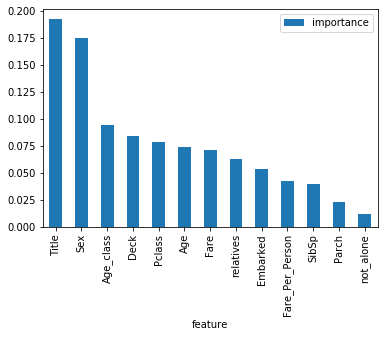

In [117]:
importances.plot.bar()

Como é visto as duas ultimas variáveis não se apresentaram significativas para o modelos, então vamos retira-las. E possivel fazer alguns testes retirando outras variáveis e vendo a acurácia do modelo.

In [118]:
#Treinando novamente sem as duas variáveis

df_train  = df_train.drop("not_alone", axis=1)
df_test  = df_test.drop("not_alone", axis=1)

df_train  = df_train.drop("Parch", axis=1)
df_test  = df_test.drop("Parch", axis=1)



In [119]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)

random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.93 %


Como visto a acuracia acabou sendo a mesma, porém devemos saber que quanto mais variáveis usamos, maior a chance de um overfitting.

In [120]:
#out-of-bag samples 

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.47999999999999 %


Fazendo Tunning dos hiperparametros do algoritmo.

Por meio do tunning podemos decidir qual os hiperparametros podemos usar, para aumentar a robustez do modelo.

In [121]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.94 %


Obteve um oob maior que o anterios com os hiperparametros em defaut, portanto iremos treinar com os parametros usados neste tunning.

- Avaliações adicionais de acurácia.

In [122]:
# Matriz de confusão

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[491,  58],
       [ 96, 246]], dtype=int64)

A matriz de confusão indicou que o modelo acertou a predição em 491 que não sobrevireram, enquanto erro de 58 ( Indicou que sobreviveu mas não sobreviveu). E acertou 246 que sobreviveram, e errou em 96 que indicou que não sobreviveu mais sobreviveu(Falso negativo).

In [123]:
#Precision and Recall:

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8092105263157895
Recall: 0.7192982456140351


O modelo predizeu que 81% dos que foram indicados que sobreviveram, realmente sobreviveram (Precision).
E o Recall indicou que 71%.

In [124]:
#F-Score - média ponderada entre precisison e recall

from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7616099071207432

- Precision Recall Curve

Para cada pessoa que o algoritmo Random Forest precisa classificar, calcula uma probabilidade com base em uma função e classifica a pessoa como sobrevivente(quando a pontuação é maior que o corte) ou não sobreviveu (quando a pontuação é menor que o corte)

Podemos plotar a precisão e o recall por meio do matplotlib.

In [125]:
from sklearn.metrics import precision_recall_curve

y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

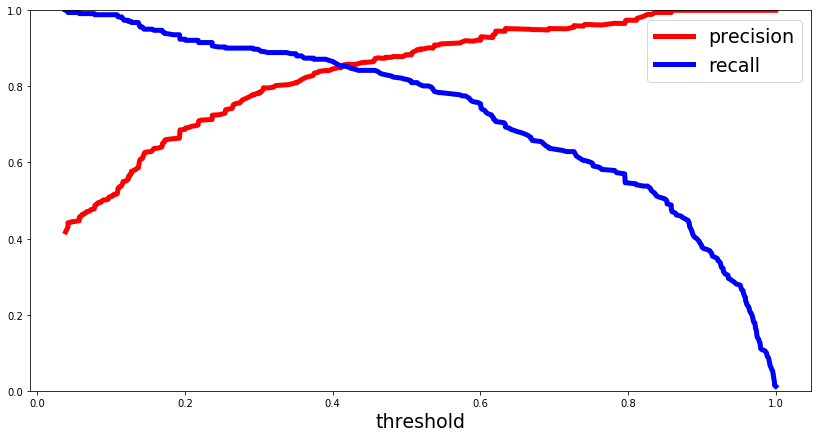

In [126]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Acima, você pode ver claramente que o recall está caindo rapidamente, com uma precisão de cerca de 85%. Por isso, convém selecionar o trade off de precisão/recall antes disso, talvez em torno de 75%. Agora você pode escolher um limite, que oferece o melhor trade off de precisão/recall para o seu atual problema de aprendizado de máquina. Se você deseja, por exemplo, uma precisão de 80%, pode facilmente ver os gráficos e ver que precisaria de um limite de cerca de 0,4. Em seguida, você pode treinar um modelo com exatamente esse limite e obter a precisão desejada.


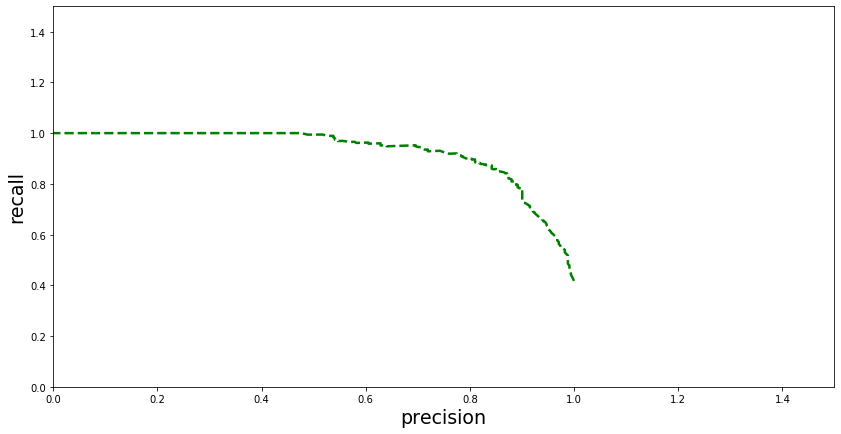

In [132]:
#Outro modo é plotar precision e recall um contra o outro

def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

- ROC AUC Curve

In [127]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

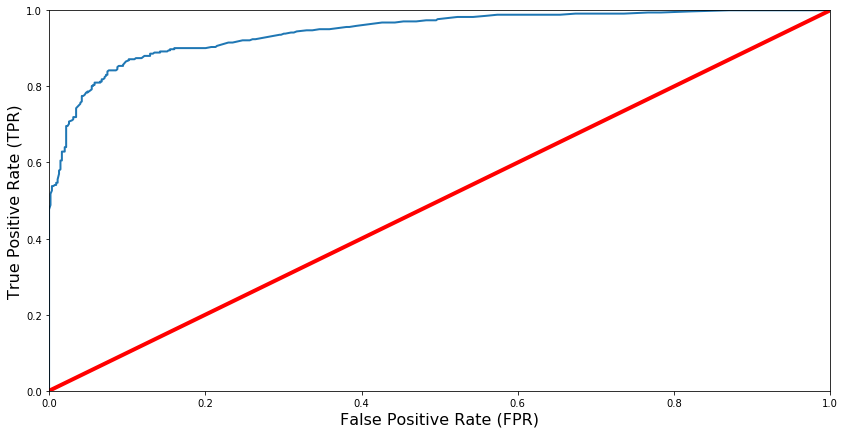

In [128]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

Essa curva analisa as taxas de true positives e false positives, para obter um parámetro para saber a acuracia do modelo. Como é visto a linha vermelha seria o puro random classifier (0) e a azul indica a taxa, portanto podemos ver que o modelo fez um bom trabalho, pois esta mais proximo de 1 em relação aos true positives.

- ROC AUC Score

In [129]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9441381991712736


Um classificador que seja 100% correto teria uma pontuação na ROC AUC igual a 1 e um classificador completamente aleatório teria uma pontuação de 0,5.

Submission

In [133]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('submission.csv', index=False)